### Problem Statement

You are a data scientist / AI engineer working on an environmental impact analysis project. You have been provided with a dataset named **`"environmental_impact_data.csv"`**, which includes various socio-economic and environmental factors influencing the environmental impact score of different regions. The dataset comprises the following columns:

- `pollution_level:` The pollution level in AQI (Air Quality Index).
- `resource_consumption:` The resource consumption in tons.
- `population_density:` The population density in people per km².
- `economic_activity:` The economic activity in millions.
- `industrial_activity:` The industrial activity in index units.
- `traffic_density:` The traffic density in vehicles per km.
- `waste_generation:` The waste generation in kg per capita.
- `renewable_energy_usage:` The renewable energy usage in percentage.
- `air_quality_index:` The air quality index.
- `carbon_footprint:` The carbon footprint in tons per year.
- `environmental_impact_score:` The environmental impact score ranging from 0 to 100.

Your task is to analyze this dataset to understand the relationships between these factors and the environmental impact score. You will also evaluate multicollinearity among the features using correlation and Variance Inflation Factor (VIF). Finally, you will build machine learning models to predict the environmental impact score based on the selected features.

**Import Necessary Libraries**

In [1]:
#Import the necessary libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

### Task 1: Data Preparation and Exploration

1. Import the data from the `"environmental_impact_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to get the complete statistics for each feature.

In [2]:
# Step 1: Import the data
df = pd.read_csv("environmental_impact_data.csv")


# Step 2: Display the number of rows and columns
print(df.shape)

# Step 3: Display the first few rows of the dataset
df.head()

(100, 11)


,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,41.84,68.83,338.27,93.18,104.96,216.85,57.15,28.66,58.02,287.70,74.87
1,38.46,72.14,353.67,120.44,72.86,233.87,46.07,36.61,92.69,322.34,43.70
2,54.97,60.23,324.93,114.66,72.64,221.37,34.13,30.88,81.90,329.35,57.47
3,56.35,71.60,202.88,127.56,75.76,129.26,47.93,24.88,76.20,300.33,21.75
4,54.00,65.76,292.23,80.19,63.19,239.81,56.24,39.24,88.57,327.12,48.77


In [3]:
# Step 4: Use describe() function to get the summary statistics for each feature

df.describe()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,48.808000,70.729900,300.088900,102.005900,77.453800,202.344900,49.75010,30.085500,80.22250,294.236400,45.309100
std,8.784509,8.804049,49.082548,18.634315,15.582053,35.482795,9.40057,5.199462,10.18513,45.320703,21.458624
min,28.440000,51.870000,173.960000,50.250000,42.180000,113.550000,28.73000,16.270000,51.98000,103.880000,0.000000
25%,43.260000,65.392500,269.847500,90.840000,66.410000,181.335000,43.84500,27.102500,74.03250,265.042500,30.827500
50%,50.130000,69.500000,298.965000,102.965000,75.995000,204.720000,49.94000,29.600000,81.26000,300.220000,43.815000
75%,54.745000,76.310000,334.762500,114.600000,88.005000,226.825000,55.65250,33.937500,86.09000,321.282500,60.540000
max,70.460000,92.410000,402.730000,140.270000,121.530000,276.940000,70.27000,40.860000,105.30000,383.820000,100.000000


### Task 2: Feature Selection Using Correlation

1. Compute the correlation matrix for the dataset.
2. Visualize the correlation matrix using a heatmap.
3. Select features based on correlation with the target variable `(environmental_impact_score)` and a threshold of 0.25.
4. Print the selected features.
5. Split the data into training and test sets and train a `Linear Regression model` using the selected features.
6. Predict and evaluate the model using R-squared and Mean Squared Error (MSE).

<AxesSubplot:>

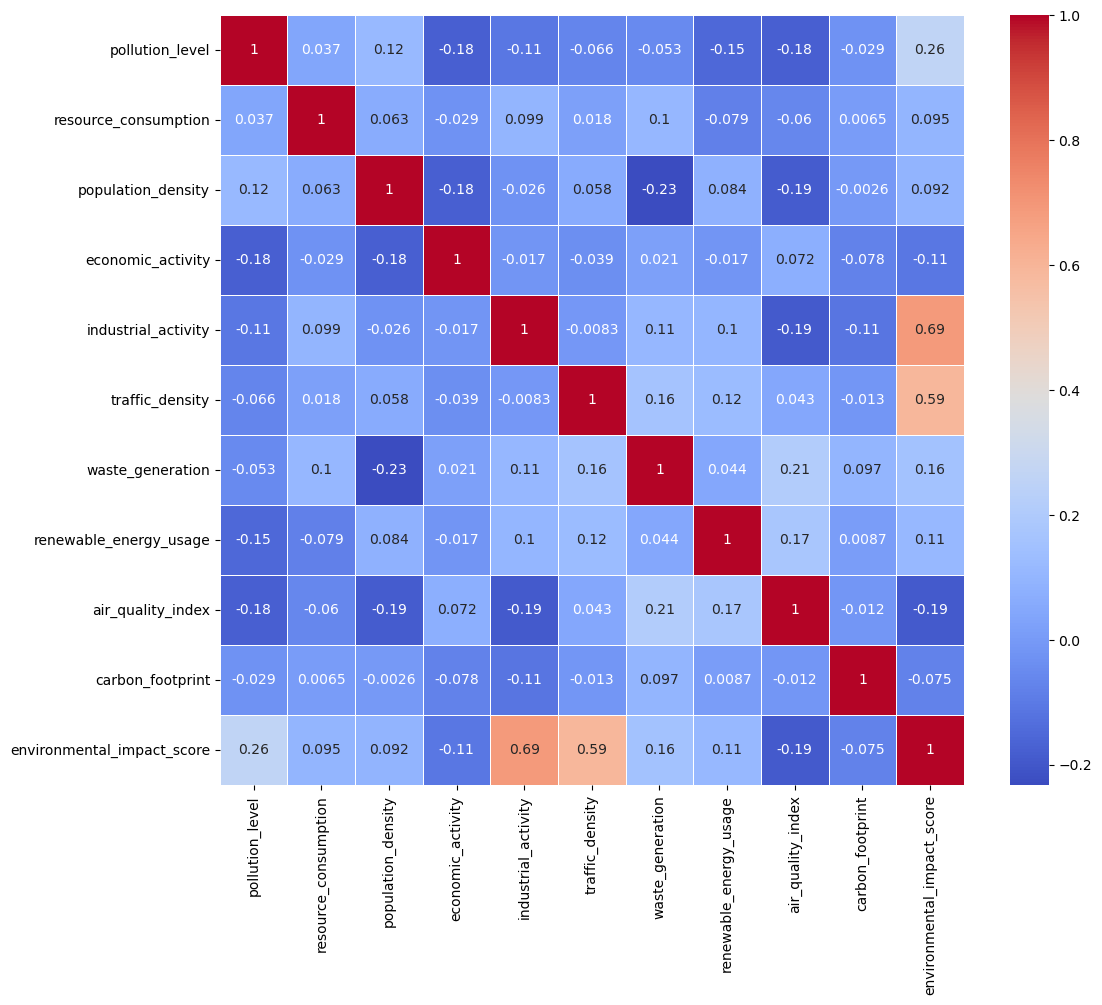

In [6]:
# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,annot = True,cmap='coolwarm', linewidths=0.5)


In [7]:
# Step 3: Select features based on correlation with the target variable
corr_target = correlation_matrix['environmental_impact_score'].abs()
selected_features_corr = corr_target[corr_target > 0.25].index.drop('environmental_impact_score')
print(corr_target)
print('*' * 50)

# Step4: Print the selected features.
print("Selected features based on correlation Threshold(0.25):", selected_features_corr)

pollution_level               0.258833
resource_consumption          0.095307
population_density            0.091759
economic_activity             0.107769
industrial_activity           0.690698
traffic_density               0.594056
waste_generation              0.155242
renewable_energy_usage        0.112714
air_quality_index             0.191543
carbon_footprint              0.075185
environmental_impact_score    1.000000
Name: environmental_impact_score, dtype: float64
**************************************************
Selected features based on correlation Threshold(0.25): Index(['pollution_level', 'industrial_activity', 'traffic_density'], dtype='object')


In [8]:
# Step5: Split the data into training and test sets and train a Linear Regression model using the selected features.
X = df[selected_features_corr] 
y = df['environmental_impact_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Step6: Predict and evaluate the model using R-squared and Mean Squared Error (MSE).

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2:", r2, "MSE:", mse)

R2: 0.9839632919535107 MSE: 7.369853604906669


### Task 3: Feature Selection Using VIF

1. Apply MinMax scaling to normalize the numerical features to a common scale.
2. Compute the `Variance Inflation Factor (VIF)` for each of the features in the scaled data,  except target variable.
3. Filter out features with a VIF greater than 8.
4. Print the filtered features.
5. Split the data into training and test sets and train a `Linear Regression model` using the selected features.
6. Predict and evaluate the model using R-squared and Mean Squared Error (MSE).

In [9]:
# Step 1: Apply MinMax scaling to normalize the numerical features (store in new dataframe)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['environmental_impact_score']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['environmental_impact_score'] = df['environmental_impact_score']
df_scaled.head()

,pollution_level,resource_consumption,population_density,economic_activity,industrial_activity,traffic_density,waste_generation,renewable_energy_usage,air_quality_index,carbon_footprint,environmental_impact_score
0,0.318896,0.418352,0.718232,0.476894,0.791178,0.632230,0.684160,0.503863,0.113278,0.656641,74.87
1,0.238458,0.500000,0.785549,0.779716,0.386641,0.736398,0.417429,0.827166,0.763503,0.780382,43.70
2,0.631366,0.206216,0.659920,0.715508,0.383869,0.659894,0.129995,0.594144,0.561140,0.805423,57.47
3,0.664208,0.486680,0.126415,0.858809,0.423188,0.096150,0.462205,0.350142,0.454239,0.701758,21.75
4,0.608282,0.342625,0.516982,0.332593,0.264776,0.772752,0.662253,0.934120,0.686234,0.797457,48.77


In [10]:
# Step 2: Compute the Variance Inflation Factor (VIF) for each of the features except target variable.
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

X = df_scaled.drop('environmental_impact_score', axis="columns")
vif_df = calculate_vif(X)
vif_df

,Variable,VIF
0,pollution_level,5.791073
1,resource_consumption,5.676857
2,population_density,7.783071
3,economic_activity,7.470285
4,industrial_activity,6.037037
5,traffic_density,7.310719
6,waste_generation,7.114373
7,renewable_energy_usage,8.735315
8,air_quality_index,8.909886
9,carbon_footprint,14.231671


In [11]:
# Step3: Filter out features with a VIF greater than 8.
filtered_features_vif = vif_df[vif_df['VIF'] <= 8]['Variable']

# Step4: Print the filtered features.
print("Filtered features based on VIF:", )
print(filtered_features_vif)

Filtered features based on VIF:
0         pollution_level
1    resource_consumption
2      population_density
3       economic_activity
4     industrial_activity
5         traffic_density
6        waste_generation
Name: Variable, dtype: object


In [12]:
# Step5: Split the data into training and test sets and train a Linear Regression model using the selected features.

# Split the data into training and test sets using the selected features from VIF
X = df_scaled[filtered_features_vif] 
y = df_scaled['environmental_impact_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Step6: Predict and evaluate the model using R-squared and Mean Squared Error (MSE).

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2:", r2, "MSE:", mse)

R2: 0.9629449374233321 MSE: 15.143834020001492
